# **GRAPH EXPLORATION PROBLEM USING ROOTED MIS CONFIGURATION**

---


### ***TEAM - 19***
### STIMULATION RESULTS

| MEMBER NAME         | ROLL NUMBER       |
|---------------------|------------------ |
| RISHI SRIVASTAVA    | 302211001002      |
| ARKA GHOSH          | 302211001008      |
| SAYANDEB SARKAR     | 302211001013      |

# STIMULATION RESULTS (GIVEN BELOW THE CODE)


---
|Round No|Node|Phase|Parent|Recent|Color|Next|Options|Target Values|MIS Nodes|Hops|
|---|---|---|---|---|---|---|---|---|---|---|
|1|v|forward||0|red|u|\['u', 'w', 'x', 'z'\]|\['blue', 'black', 'black', 'black'\]|\['v'\]|0|
|2|u|forward|v|2|blue|w|\['v', 'w', 'y'\]|\['red', 'blue', 'black'\]|\['v'\]|1|
|3|w|forward|u|4|blue|t|\['t', 'u', 'v', 'x', 'z'\]|\['red', 'blue', 'red', 'black', 'black'\]|\['v', 't'\]|2|
|4|t|forward|w|1|red|x|\['w', 'x'\]|\['blue', 'blue'\]|\['v', 't'\]|3|
|5|x|forward|t|3|blue|y|\['t', 'v', 'w', 'y'\]|\['red', 'red', 'blue', 'red'\]|\['v', 't', 'y'\]|4|
|6|y|forward|x|2|red|z|\['u', 'x', 'z'\]|\['blue', 'blue', 'blue'\]|\['v', 't', 'y'\]|5|
|7|z|backtrack|y|2|blue|y|\['v', 'w', 'y'\]|\['red', 'blue', 'red'\]|\['v', 't', 'y'\]|6|
|8|y|backtrack|x|2|red|z|\['u', 'x', 'z'\]|\['blue', 'blue', 'blue'\]|\['v', 't', 'y'\]|5|
|9|x|backtrack|t|3|blue|y|\['t', 'v', 'w', 'y'\]|\['red', 'red', 'blue', 'red'\]|\['v', 't', 'y'\]|4|
|10|t|backtrack|w|1|red|x|\['w', 'x'\]|\['blue', 'blue'\]|\['v', 't', 'y'\]|3|
|11|w|backtrack|u|4|blue|t|\['t', 'u', 'v', 'x', 'z'\]|\['red', 'blue', 'red', 'blue', 'blue'\]|\['v', 't', 'y'\]|2|
|12|u|backtrack|v|2|blue|w|\['v', 'w', 'y'\]|\['red', 'blue', 'red'\]|\['v', 't', 'y'\]|1|
|13|v|backtrack||0|red|u|\['u', 'w', 'x', 'z'\]|\['blue', 'blue', 'blue', 'blue'\]|\['v', 't', 'y'\]|0|
|Final|MIS Nodes||||||||\['v', 't', 'y'\]||

**Final MIS Nodes: `['v', 't', 'y']`**

In [ ]:
class AgentNode:
    def __init__(self, node_id, ports):
        self.node_id = node_id
        self.ports = ports  # Neighboring nodes (sorted order)
        self.settled = False
        self.color = "black"  # Default
        self.parent = None
        self.recent = 0
        self.next = None
        self.scouted_ports = set()
        self.hops = 0  # Added hop count

    def settle(self, parent, color):
        self.settled = True
        self.parent = parent
        self.color = color

    def update_recent(self, s, max_ports):
        self.recent = min(self.recent + s - 1, max_ports - 1)

    def choose_next_port(self, agents):
        unvisited_ports = [p for p in self.ports if not agents[p].settled]
        return unvisited_ports[0] if unvisited_ports else None

    def __repr__(self):
        return f"Node {self.node_id}: settled={self.settled}, color={self.color}, parent={self.parent}, recent={self.recent}, next={self.next}, hops={self.hops}"


def forward_phase(agents, graph, mis_nodes, steps, round_no):
    queue = [list(graph.keys())[0]]  # Start from the first node in sorted order
    while queue:
        current = queue.pop(0)
        agent = agents[current]
        step_output = []

        step_output.append(f"-------------------------------------\nRound No {round_no} : {agent.node_id}.phase = forward\n-------------------------------------")
        step_output.append(f"Node {agent.node_id} arrives from {agent.parent} ({agent.recent})")
        step_output.append(f"{agent.node_id}.settled = True")
        step_output.append(f"{agent.node_id}.color = red")
        step_output.append(f"{agent.node_id}.parent = {agent.parent}")
        step_output.append(f"{agent.node_id}.hops = {agent.hops}")  # Added hop info
        step_output.append(f"Options for {agent.node_id}: {agent.ports}, Target Values: {[agents[p].color for p in agent.ports]}")

        for port in agent.ports:
            neighbor = agents[port]
            if not neighbor.settled:
                queue.append(port)
                neighbor.settle(current, "black")
                neighbor.hops = agent.hops + 1  # Set hops based on parent
                neighbor.update_recent(len(neighbor.ports), len(graph[port]))
                agent.scouted_ports.add(port)

                red_neighbors = [agents[p] for p in neighbor.ports if agents[p].color == "red"]
                if red_neighbors:
                    neighbor.color = "blue"
                elif all(agents[p].color in ("black", "blue") for p in neighbor.ports):
                    neighbor.color = "red"
                    mis_nodes.append(port)

                neighbor.next = neighbor.choose_next_port(agents)
                step_output.append(f"{agent.node_id}.next = {agent.next}")
                steps.append("\n".join(step_output))
                steps.append(f"----------------------------------------\nMIS Nodes: {mis_nodes}\n-----------------------------------------")
                round_no += 1
                break
    return round_no


def backtrack_phase(agents, graph, mis_nodes, steps, round_no):
    for node in reversed(list(graph.keys())):
        agent = agents[node]
        step_output = []

        step_output.append(f"-------------------------------------\nRound No {round_no} : {agent.node_id}.phase = backtrack\n-------------------------------------")
        unexplored_ports = [p for p in agent.ports if not agents[p].settled]

        if agent.next is None and unexplored_ports:
            agent.next = unexplored_ports[0]
            step_output.append(f"Node {agent.node_id}: Explore remaining ports (port {agent.next}).")
        elif agent.next is None:
            agent.next = agent.parent

        step_output.append(f"Backtrack : Node {agent.node_id}:")
        step_output.append(f"settled = {agent.settled}")
        step_output.append(f"color = {agent.color}")
        step_output.append(f"parent = {agent.parent}")
        step_output.append(f"recent = {agent.recent}")
        step_output.append(f"next = {agent.next}")
        step_output.append(f"hops = {agent.hops}")  # Added hop info
        step_output.append(f"Options for {agent.node_id}: {agent.ports}, Target Values: {[agents[p].color for p in agent.ports]}")
        steps.append("\n".join(step_output))
        steps.append(f"----------------------------------------\nMIS Nodes: {mis_nodes}\n-----------------------------------------")
        round_no += 1
    return round_no


def mis_algorithm(graph, start_node):
    agents = {node: AgentNode(node, neighbors) for node, neighbors in graph.items()}
    steps = []
    mis_nodes = []

    root = start_node
    agents[root].settle(None, "red")
    agents[root].hops = 0  # Initialize root's hop count
    agents[root].next = agents[root].choose_next_port(agents)
    mis_nodes.append(root)

    round_no = 1  # Start from round 1
    round_no = forward_phase(agents, graph, mis_nodes, steps, round_no)
    round_no = backtrack_phase(agents, graph, mis_nodes, steps, round_no)

    steps.append(f"Final MIS Nodes: {mis_nodes}")
    return steps


graph = {
    'v': ['u', 'w', 'x', 'z'],
    'u': ['v', 'w', 'y'],
    'w': ['t', 'u', 'v', 'x', 'z'],
    't': ['w', 'x'],
    'x': ['t', 'v', 'w', 'y'],
    'y': ['u', 'x', 'z'],
    'z': ['v', 'w', 'y']
}

steps = mis_algorithm(graph, 'v')
for step in steps:
    print(step)

-------------------------------------
Round No 1 : v.phase = forward
-------------------------------------
Node v arrives from None (0)
v.settled = True
v.color = red
v.parent = None
v.hops = 0
Options for v: ['u', 'w', 'x', 'z'], Target Values: ['black', 'black', 'black', 'black']
v.next = u
----------------------------------------
MIS Nodes: ['v']
-----------------------------------------
-------------------------------------
Round No 2 : u.phase = forward
-------------------------------------
Node u arrives from v (2)
u.settled = True
u.color = red
u.parent = v
u.hops = 1
Options for u: ['v', 'w', 'y'], Target Values: ['red', 'black', 'black']
u.next = w
----------------------------------------
MIS Nodes: ['v']
-----------------------------------------
-------------------------------------
Round No 3 : w.phase = forward
-------------------------------------
Node w arrives from u (4)
w.settled = True
w.color = red
w.parent = u
w.hops = 2
Options for w: ['t', 'u', 'v', 'x', 'z'], Targ

# STIMULATION RESULTS (STORED IN CSV FILE)

In [ ]:
import csv

class AgentNode:
    def __init__(self, node_id, ports):
        self.node_id = node_id
        self.ports = ports  # Neighboring nodes (sorted order)
        self.settled = False
        self.color = "black"  # Default
        self.parent = None
        self.recent = 0
        self.next = None
        self.scouted_ports = set()
        self.hops = 0

    def settle(self, parent, color, hops):
        self.settled = True
        self.parent = parent
        self.color = color
        self.hops = hops

    def update_recent(self, s, max_ports):
        self.recent = min(self.recent + s - 1, max_ports - 1)

    def choose_next_port(self, agents):
        unvisited_ports = [p for p in self.ports if not agents[p].settled]
        return unvisited_ports[0] if unvisited_ports else None

    def __repr__(self):
        return f"Node {self.node_id}: settled={self.settled}, color={self.color}, parent={self.parent}, recent={self.recent}, next={self.next}, hops={self.hops}"


def forward_phase(agents, graph, mis_nodes, steps, csv_data, round_no):
    queue = [list(graph.keys())[0]]  # Start from the first node in sorted order
    while queue:
        current = queue.pop(0)
        agent = agents[current]

        step_output = [
            f"-------------------------------------",
            f"Round No {round_no} : {agent.node_id}.phase = forward",
            f"-------------------------------------",
            f"Node {agent.node_id} arrives from {agent.parent} ({agent.recent})",
            f"{agent.node_id}.settled = True",
            f"{agent.node_id}.color = red",
            f"{agent.node_id}.parent = {agent.parent}",
            f"{agent.node_id}.hops = {agent.hops}",
            f"Options for {agent.node_id}: {agent.ports}, Target Values: {[agents[p].color for p in agent.ports]}"
        ]

        for port in agent.ports:
            neighbor = agents[port]
            if not neighbor.settled:
                queue.append(port)
                neighbor.settle(current, "black", agent.hops + 1)
                neighbor.update_recent(len(neighbor.ports), len(graph[port]))
                agent.scouted_ports.add(port)

                red_neighbors = [agents[p] for p in neighbor.ports if agents[p].color == "red"]
                if red_neighbors:
                    neighbor.color = "blue"
                elif all(agents[p].color in ("black", "blue") for p in neighbor.ports):
                    neighbor.color = "red"
                    mis_nodes.append(port)

                neighbor.next = neighbor.choose_next_port(agents)
                step_output.append(f"{agent.node_id}.next = {agent.next}")

                # Append to CSV data
                csv_data.append([round_no, agent.node_id, "forward", agent.parent, agent.recent, agent.color, agent.next, agent.ports, [agents[p].color for p in agent.ports], list(mis_nodes), agent.hops])

                steps.append("\n".join(step_output))
                steps.append(f"----------------------------------------\nMIS Nodes: {mis_nodes}\n-----------------------------------------")
                round_no += 1
                break
    return round_no


def backtrack_phase(agents, graph, mis_nodes, steps, csv_data, round_no):
    for node in reversed(list(graph.keys())):
        agent = agents[node]

        step_output = [
            f"-------------------------------------",
            f"Round No {round_no} : {agent.node_id}.phase = backtrack",
            f"-------------------------------------"
        ]

        unexplored_ports = [p for p in agent.ports if not agents[p].settled]

        if agent.next is None and unexplored_ports:
            agent.next = unexplored_ports[0]
            step_output.append(f"Node {agent.node_id}: Explore remaining ports (port {agent.next}).")
        elif agent.next is None:
            agent.next = agent.parent

        step_output.extend([
            f"Backtrack : Node {agent.node_id}:",
            f"settled = {agent.settled}",
            f"color = {agent.color}",
            f"parent = {agent.parent}",
            f"recent = {agent.recent}",
            f"next = {agent.next}",
            f"hops = {agent.hops}",
            f"Options for {agent.node_id}: {agent.ports}, Target Values: {[agents[p].color for p in agent.ports]}"
        ])

        # Append to CSV data
        csv_data.append([round_no, agent.node_id, "backtrack", agent.parent, agent.recent, agent.color, agent.next, agent.ports, [agents[p].color for p in agent.ports], list(mis_nodes), agent.hops])

        steps.append("\n".join(step_output))
        steps.append(f"----------------------------------------\nMIS Nodes: {mis_nodes}\n-----------------------------------------")
        round_no += 1
    return round_no


def mis_algorithm(graph, start_node):
    agents = {node: AgentNode(node, neighbors) for node, neighbors in graph.items()}
    steps = []
    mis_nodes = []
    csv_data = []

    root = start_node
    agents[root].settle(None, "red", 0)
    agents[root].next = agents[root].choose_next_port(agents)
    mis_nodes.append(root)

    round_no = 1
    round_no = forward_phase(agents, graph, mis_nodes, steps, csv_data, round_no)
    round_no = backtrack_phase(agents, graph, mis_nodes, steps, csv_data, round_no)

    steps.append(f"Final MIS Nodes: {mis_nodes}")
    csv_data.append(["Final", "MIS Nodes", "", "", "", "", "", "", "", mis_nodes, ""])

    # Save CSV file
    csv_filename = "stimulation_results.csv"
    with open(csv_filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Round No", "Node", "Phase", "Parent", "Recent", "Color", "Next", "Options", "Target Values", "MIS Nodes", "Hops"])
        writer.writerows(csv_data)

    return steps, csv_filename


# Define the graph
graph = {
    'v': ['u', 'w', 'x', 'z'],
    'u': ['v', 'w', 'y'],
    'w': ['t', 'u', 'v', 'x', 'z'],
    't': ['w', 'x'],
    'x': ['t', 'v', 'w', 'y'],
    'y': ['u', 'x', 'z'],
    'z': ['v', 'w', 'y']
}

# Run the algorithm
steps, csv_filepath = mis_algorithm(graph, 'v')

# Return the CSV file path for downloading
csv_filepath

'stimulation_results.csv'

# GRAPH EXPLORATION STEPS (ARE PRINTED BELOW USING GRAPH REPRESENTATION)

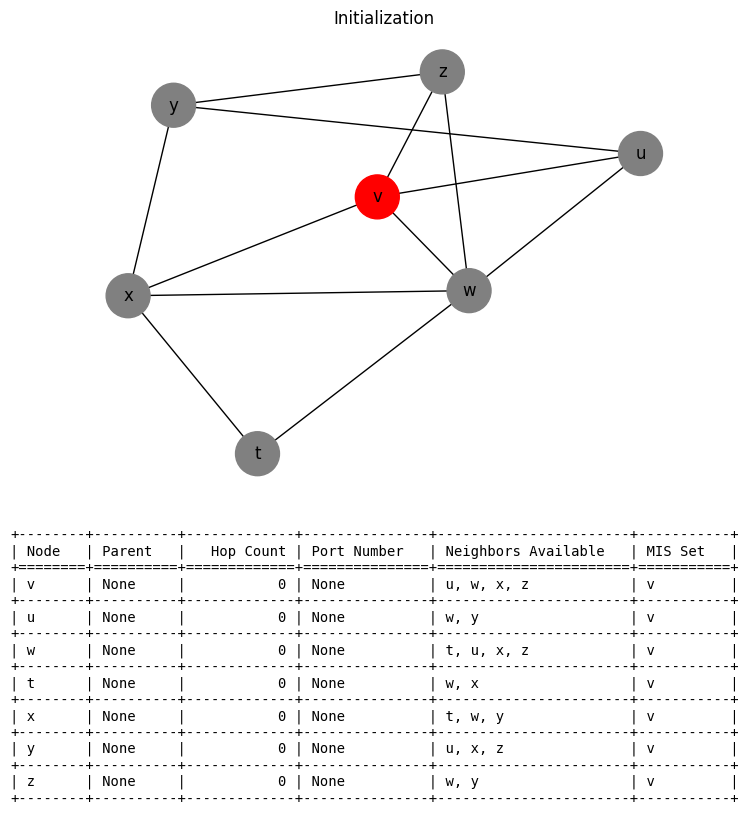

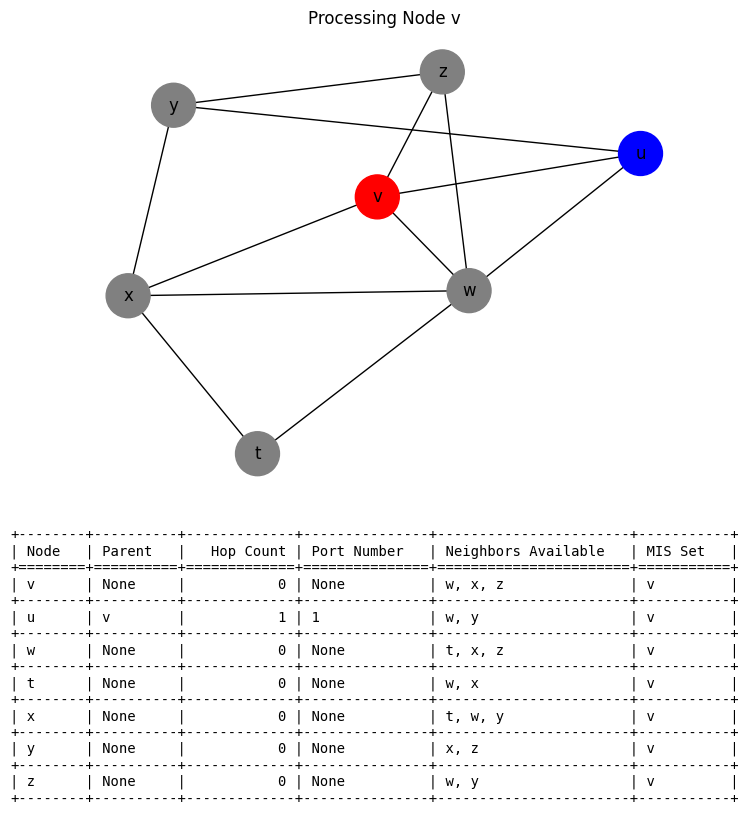

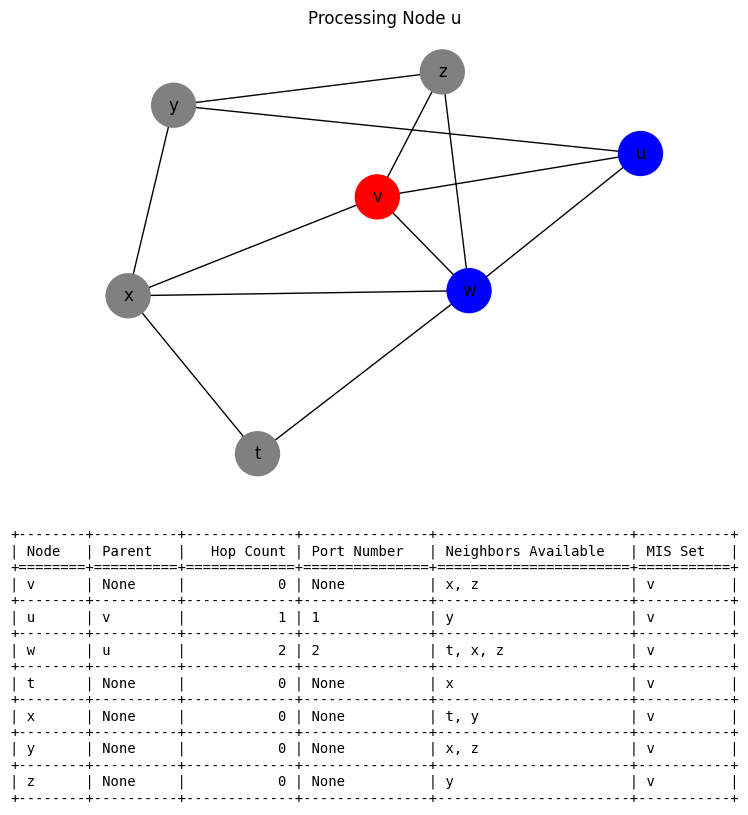

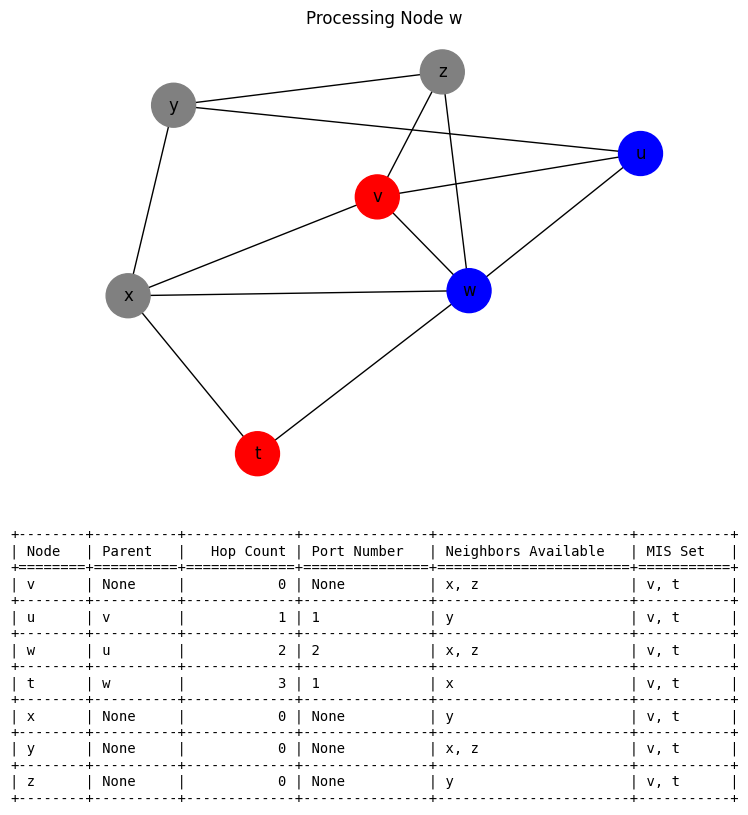

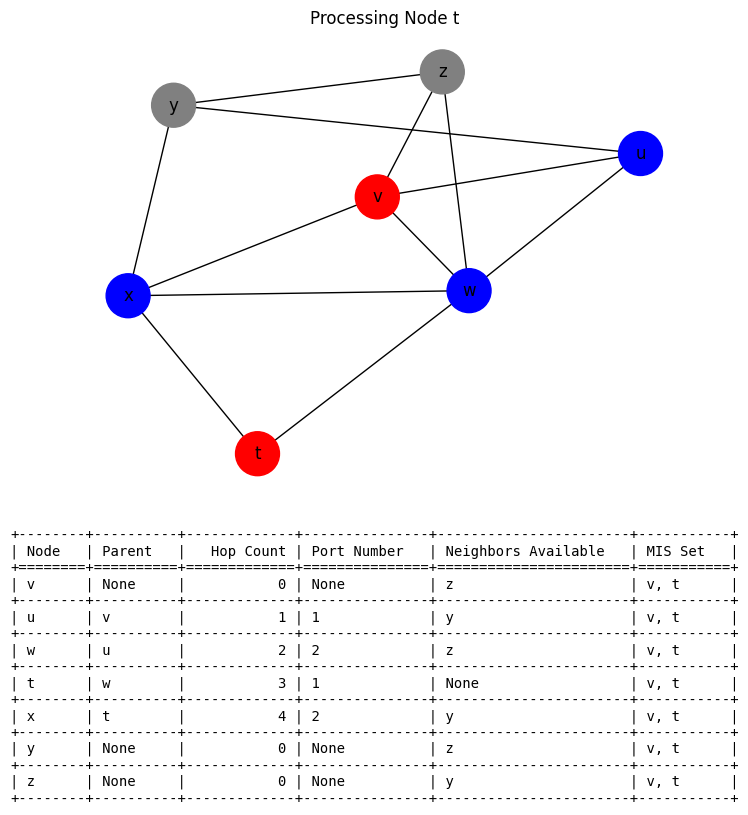

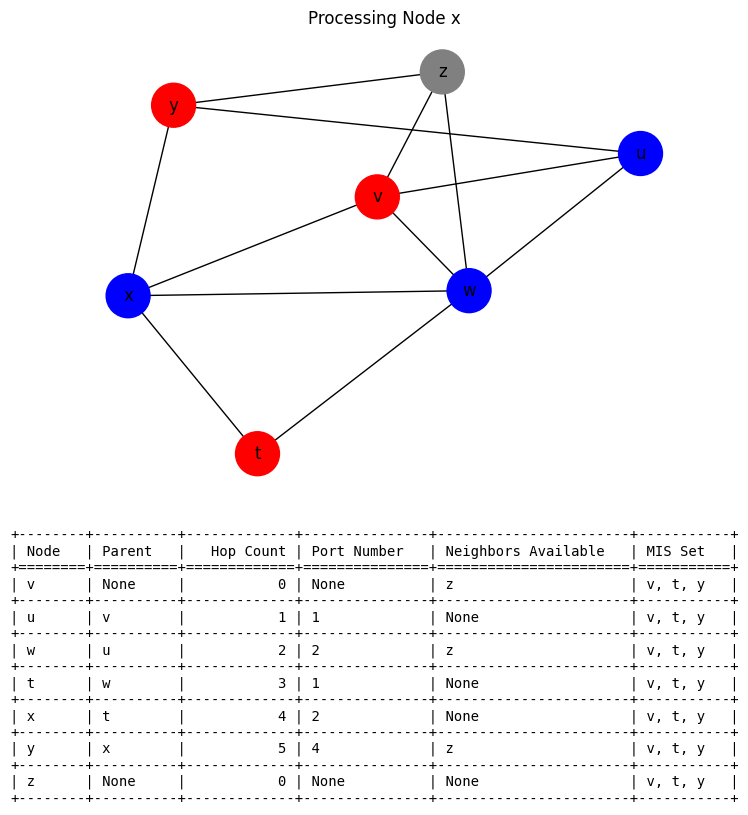

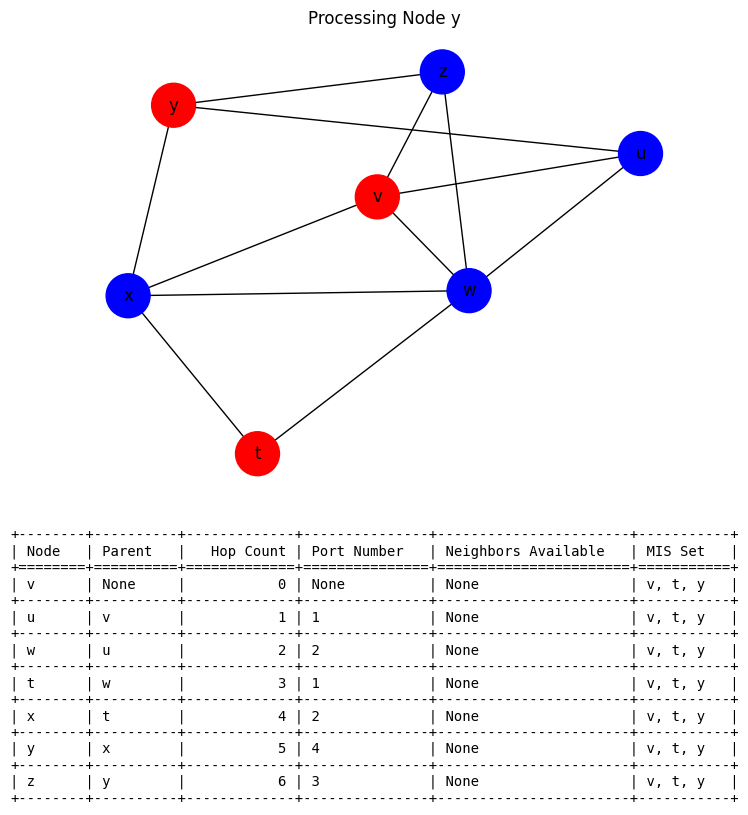

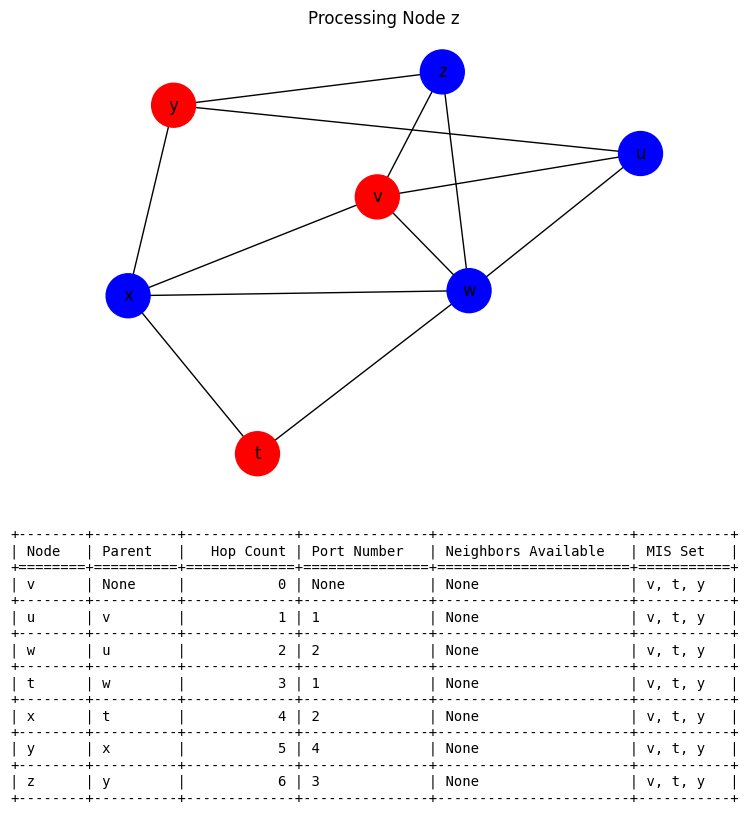

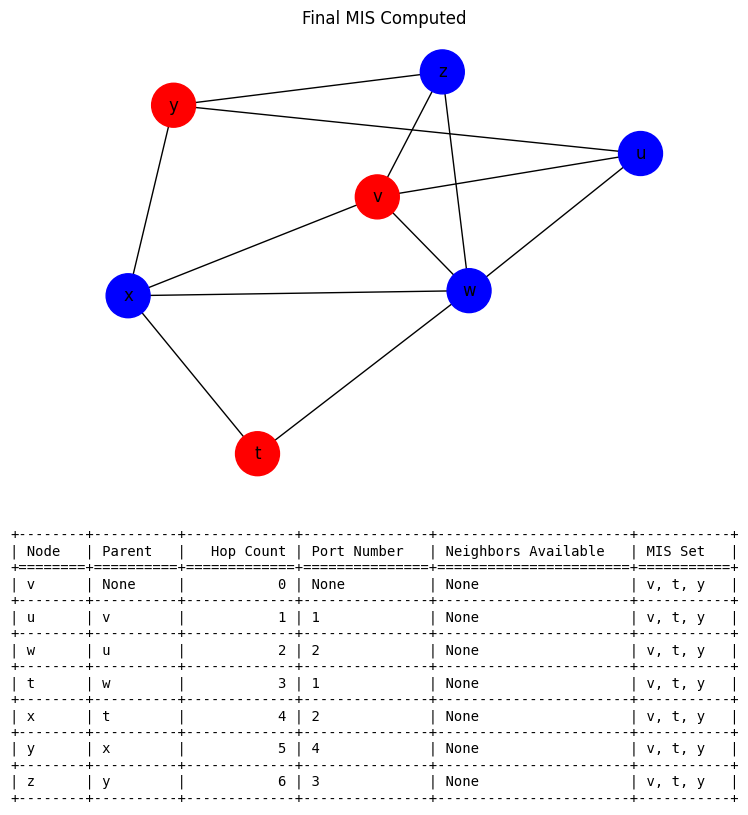

Final MIS Nodes: ['v', 't', 'y']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from tabulate import tabulate

class AgentNode:
    def __init__(self, node_id, ports):
        self.node_id = node_id
        self.ports = ports  # Neighboring nodes (sorted order)
        self.settled = False
        self.color = "black"  # Default
        self.parent = None
        self.hop_count = 0
        self.port_number = None  # Track port number

    def settle(self, parent, color, hop_count=0, port_number=None):
        self.settled = True
        self.parent = parent
        self.color = color
        self.hop_count = hop_count
        self.port_number = port_number

    def choose_next_port(self, agents):
        for idx, p in enumerate(self.ports, start=1):
            if not agents[p].settled:
                return p, idx
        return None, None

def draw_graph(graph, agents, step_title, pos, mis_nodes):
    G = nx.Graph()
    G.add_edges_from([(node, neighbor) for node in graph for neighbor in graph[node]])

    color_map = {"red": "red", "blue": "blue", "black": "gray"}
    node_colors = [color_map[agents[node].color] for node in G.nodes()]
    node_labels = {node: node for node in G.nodes()}

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_color=node_colors, edge_color='black',
            node_size=1000, font_size=12, font_color="black", ax=ax)
    plt.title(step_title)

    table_data = []
    for node, agent in agents.items():
        unvisited_neighbors = [p for p in agent.ports if not agents[p].settled]
        table_data.append([
            node,
            agent.parent if agent.parent else "None",
            agent.hop_count,
            agent.port_number if agent.port_number else "None",
            ", ".join(unvisited_neighbors) if unvisited_neighbors else "None",
            ", ".join(mis_nodes)
        ])

    table = tabulate(table_data, headers=["Node", "Parent", "Hop Count", "Port Number", "Neighbors Available", "MIS Set"], tablefmt="grid")
    plt.figtext(0.5, -0.4, table, wrap=True, horizontalalignment='center', fontsize=10, family="monospace")

    plt.show()
    time.sleep(0.5)

def mis_algorithm(graph, start_node):
    agents = {node: AgentNode(node, neighbors) for node, neighbors in graph.items()}
    mis_nodes = []

    G = nx.Graph()
    G.add_edges_from([(node, neighbor) for node in graph for neighbor in graph[node]])
    pos = nx.spring_layout(G, seed=42)

    agents[start_node].settle(None, "red", hop_count=0, port_number=0)
    mis_nodes.append(start_node)
    draw_graph(graph, agents, "Initialization", pos, mis_nodes)

    queue = [(start_node, 0)]

    while queue:
        current, hops = queue.pop(0)
        agent = agents[current]

        next_port, port_number = agent.choose_next_port(agents)
        if next_port:
            neighbor = agents[next_port]
            neighbor.settle(current, "black", hop_count=hops + 1, port_number=port_number)

            red_neighbors = [agents[p] for p in neighbor.ports if agents[p].color == "red"]
            if red_neighbors:
                neighbor.color = "blue"
            elif all(agents[p].color in ("black", "blue") for p in neighbor.ports):
                neighbor.color = "red"
                mis_nodes.append(next_port)

            queue.append((next_port, hops + 1))

        draw_graph(graph, agents, f"Processing Node {current}", pos, mis_nodes)

    draw_graph(graph, agents, "Final MIS Computed", pos, mis_nodes)
    print("Final MIS Nodes:", mis_nodes)

# Time Complexity: O(V + E) where V is the number of nodes and E is the number of edges
# Space Complexity: O(V) for storing the agents and queue

# Sample Graph
graph = {
    'v': ['u', 'w', 'x', 'z'],
    'u': ['v', 'w', 'y'],
    'w': ['t', 'u', 'v', 'x', 'z'],
    't': ['w', 'x'],
    'x': ['t', 'v', 'w', 'y'],
    'y': ['u', 'x', 'z'],
    'z': ['v', 'w', 'y']
}

mis_algorithm(graph, 'v')